<a href="https://colab.research.google.com/github/ivandenb/MAT-442-Fall-2024-/blob/main/Second_edition_of_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instantiate Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Create the ANN model

In [3]:
# Build the ANN model
ann_model = models.Sequential()
ann_model.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(layers.Dense(16, activation='relu'))
ann_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Accuracy: {ann_accuracy:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6304 - loss: 0.6589 - val_accuracy: 0.7489 - val_loss: 0.6047
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7257 - loss: 0.6021 - val_accuracy: 0.7576 - val_loss: 0.5753
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7613 - loss: 0.5558 - val_accuracy: 0.7576 - val_loss: 0.5523
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7826 - loss: 0.5319 - val_accuracy: 0.7446 - val_loss: 0.5378
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7796 - loss: 0.5108 - val_accuracy: 0.7446 - val_loss: 0.5253
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7981 - loss: 0.4619 - val_accuracy: 0.7446 - val_loss: 0.5215
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7979 - loss: 0.4470 - val_accuracy: 0.7316 - val_loss: 0.5202
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7982 - loss: 0.4654 - val_accuracy: 0.7316 - val_loss: 0.52

Create the CNN model

In [4]:
# Reshape input for CNN (1D data input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6470 - loss: 0.6688 - val_accuracy: 0.6926 - val_loss: 0.6313
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7040 - loss: 0.6122 - val_accuracy: 0.7013 - val_loss: 0.6022
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7449 - loss: 0.5779 - val_accuracy: 0.7229 - val_loss: 0.5794
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.5214 - val_accuracy: 0.7316 - val_loss: 0.5580
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7677 - loss: 0.5044 - val_accuracy: 0.7446 - val_loss: 0.5417
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7268 - loss: 0.5224 - val_accuracy: 0.7576 - val_loss: 0.5296
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7748 - loss: 0.4733 - val_accuracy: 0.7662 - val_loss: 0.5256
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.4538 - val_accuracy: 0.7619 - val_loss: 0.5204
E

Create the RNN model

In [5]:
# Reshape input for RNN (sequence data input)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model
rnn_model = models.Sequential()
rnn_model.add(layers.SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(layers.Dense(16, activation='relu'))
rnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4735 - loss: 0.6987 - val_accuracy: 0.6234 - val_loss: 0.6685
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6965 - loss: 0.6459 - val_accuracy: 0.6364 - val_loss: 0.6382
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6742 - loss: 0.6202 - val_accuracy: 0.6623 - val_loss: 0.6136
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7129 - loss: 0.5683 - val_accuracy: 0.6580 - val_loss: 0.6043
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7094 - loss: 0.5343 - val_accuracy: 0.6494 - val_loss: 0.5901
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7100 - loss: 0.5133 - val_accuracy: 0.6753 - val_loss: 0.5733
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7119 - loss: 0.5222 - val_accuracy: 0.6580 - val_loss: 0.5604
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7305 - loss: 0.5079 - val_accuracy: 0.6883 - val_loss: 0.5495
Ep

Create the LTSM model

In [11]:
# Build the LSTM model
lstm_model = models.Sequential()
lstm_model.add(layers.LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(layers.Dense(16, activation='relu'))
lstm_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4376 - loss: 0.6962 - val_accuracy: 0.6753 - val_loss: 0.6838
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6961 - loss: 0.6789 - val_accuracy: 0.6883 - val_loss: 0.6672
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7270 - loss: 0.6548 - val_accuracy: 0.6926 - val_loss: 0.6435
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7217 - loss: 0.6249 - val_accuracy: 0.7100 - val_loss: 0.6153
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7233 - loss: 0.5695 - val_accuracy: 0.6797 - val_loss: 0.6214
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7530 - loss: 0.5421 - val_accuracy: 0.7056 - val_loss: 0.6045
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7399 - loss: 0.5385 - val_accuracy: 0.6970 - val_loss: 0.5946
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.5418 - val_accuracy: 0.6926 - val_loss

Create the CNN+RNN model

In [7]:
# Build the CNN + RNN hybrid model
cnn_rnn_model = models.Sequential()
cnn_rnn_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_rnn_model.add(layers.MaxPooling1D(2))
cnn_rnn_model.add(layers.SimpleRNN(32, activation='relu'))
cnn_rnn_model.add(layers.Dense(16, activation='relu'))
cnn_rnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
cnn_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_rnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_rnn_loss, cnn_rnn_accuracy = cnn_rnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN + RNN Accuracy: {cnn_rnn_accuracy:.4f}")

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4829 - loss: 0.7013 - val_accuracy: 0.6537 - val_loss: 0.6541
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6724 - loss: 0.6252 - val_accuracy: 0.6580 - val_loss: 0.6051
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6796 - loss: 0.5743 - val_accuracy: 0.7100 - val_loss: 0.5628
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7738 - loss: 0.5085 - val_accuracy: 0.7446 - val_loss: 0.5272
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7365 - loss: 0.5053 - val_accuracy: 0.7489 - val_loss: 0.5186
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7523 - loss: 0.4903 - val_accuracy: 0.7403 - val_loss: 0.5167
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7755 - loss: 0.4483 - val_accuracy: 0.7143 - val_loss: 0.5230
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7726 - loss: 0.4318 - val_accuracy: 0.7489 - val_loss

Create a CNN-RNN model

In [8]:
# Build the CNN + RNN hybrid model
cnn_rnn_model = models.Sequential()
cnn_rnn_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_rnn_model.add(layers.MaxPooling1D(2))
cnn_rnn_model.add(layers.SimpleRNN(32, activation='relu'))
cnn_rnn_model.add(layers.Dense(16, activation='relu'))
cnn_rnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
cnn_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_rnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_rnn_loss, cnn_rnn_accuracy = cnn_rnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN + RNN Accuracy: {cnn_rnn_accuracy:.4f}")

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3692 - loss: 0.7425 - val_accuracy: 0.6147 - val_loss: 0.6840
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6651 - loss: 0.6735 - val_accuracy: 0.6840 - val_loss: 0.6603
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7222 - loss: 0.6496 - val_accuracy: 0.7056 - val_loss: 0.6321
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7130 - loss: 0.6211 - val_accuracy: 0.7100 - val_loss: 0.5934
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7341 - loss: 0.5687 - val_accuracy: 0.7229 - val_loss: 0.5558
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7479 - loss: 0.5232 - val_accuracy: 0.7316 - val_loss: 0.5390
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7614 - loss: 0.4884 - val_accuracy: 0.7706 - val_loss: 0.5244
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7664 - loss: 0.4669 - val_accuracy: 0.7489 - val_loss

Create the CNN-LSTM

In [9]:
# Build the CNN + LSTM hybrid model
cnn_lstm_model = models.Sequential()
cnn_lstm_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_lstm_model.add(layers.MaxPooling1D(2))
cnn_lstm_model.add(layers.LSTM(32, activation='relu'))
cnn_lstm_model.add(layers.Dense(16, activation='relu'))
cnn_lstm_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_lstm_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_cnn, y_test)
print(f"CNN + LSTM Accuracy: {cnn_lstm_accuracy:.4f}")

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6474 - loss: 0.6836 - val_accuracy: 0.6797 - val_loss: 0.6681
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6880 - loss: 0.6617 - val_accuracy: 0.7056 - val_loss: 0.6438
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6814 - loss: 0.6314 - val_accuracy: 0.6926 - val_loss: 0.6285
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.6048 - val_accuracy: 0.6926 - val_loss: 0.6286
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7376 - loss: 0.5741 - val_accuracy: 0.6970 - val_loss: 0.6274
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6879 - loss: 0.6024 - val_accuracy: 0.6926 - val_loss: 0.6080
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7223 - loss: 0.5805 - val_accuracy: 0.6970 - val_loss: 0.6010
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7702 - loss: 0.5393 - val_accuracy: 0.7013 - val_loss

Evaluate using the ROC curve

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


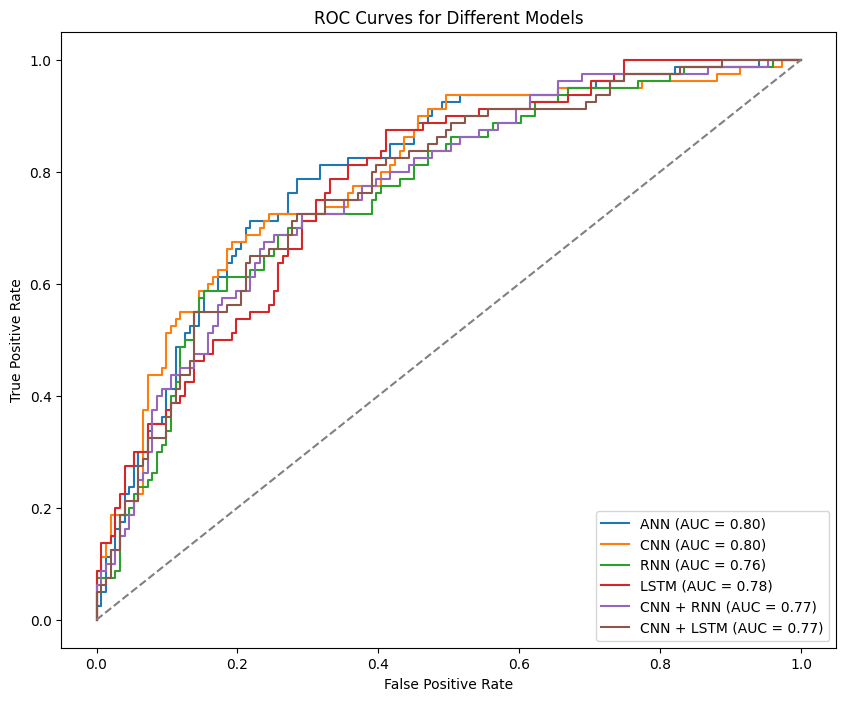

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

plot_roc_curve(ann_model, X_test, y_test, "ANN")
plot_roc_curve(cnn_model, X_test_cnn, y_test, "CNN")
plot_roc_curve(rnn_model, X_test_rnn, y_test, "RNN")
plot_roc_curve(lstm_model, X_test_rnn, y_test, "LSTM")
plot_roc_curve(cnn_rnn_model, X_test_cnn, y_test, "CNN + RNN")
plot_roc_curve(cnn_lstm_model, X_test_cnn, y_test, "CNN + LSTM")

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


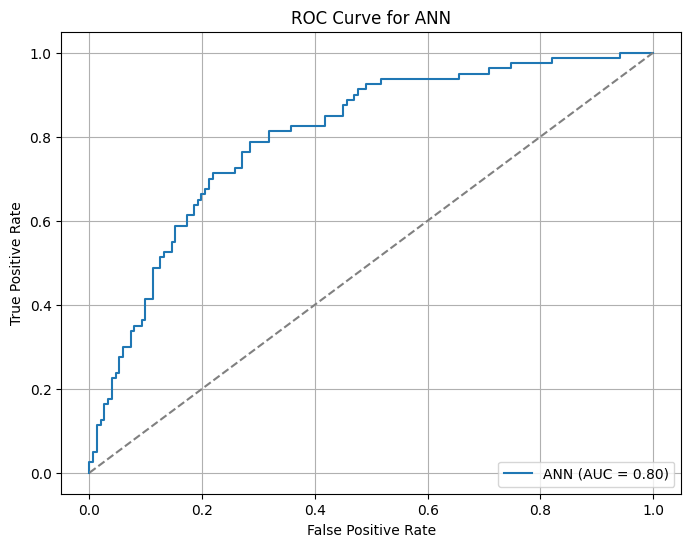

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


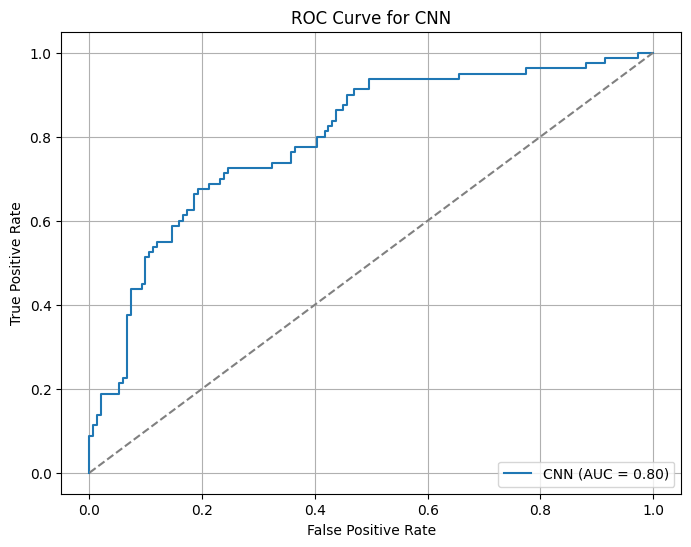

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


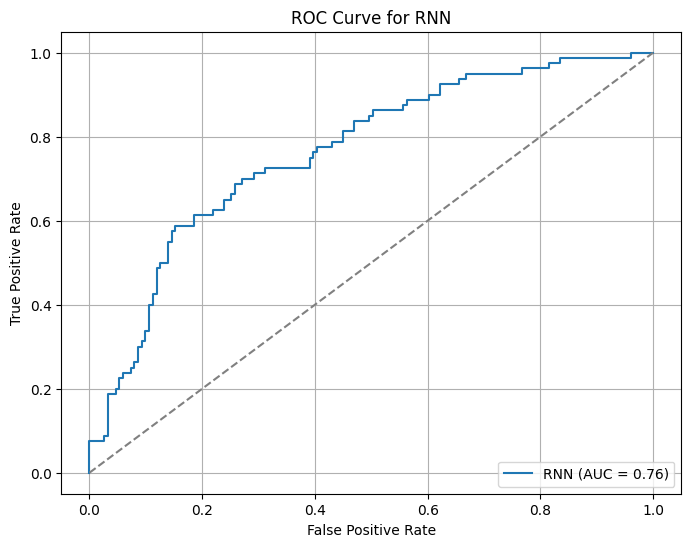

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


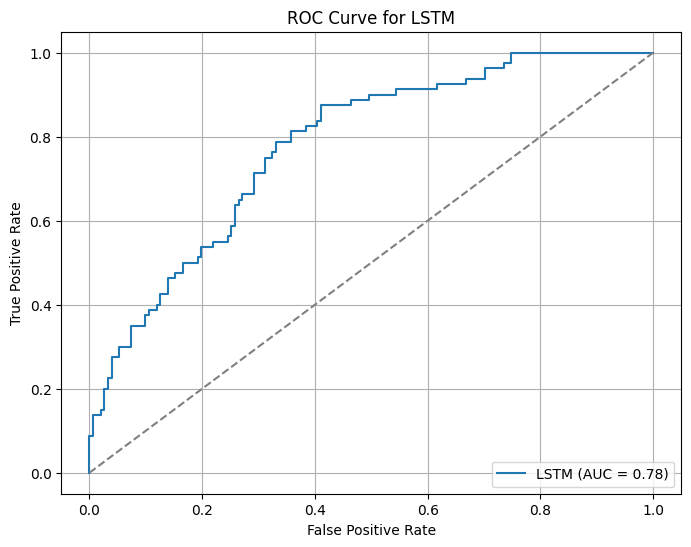

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


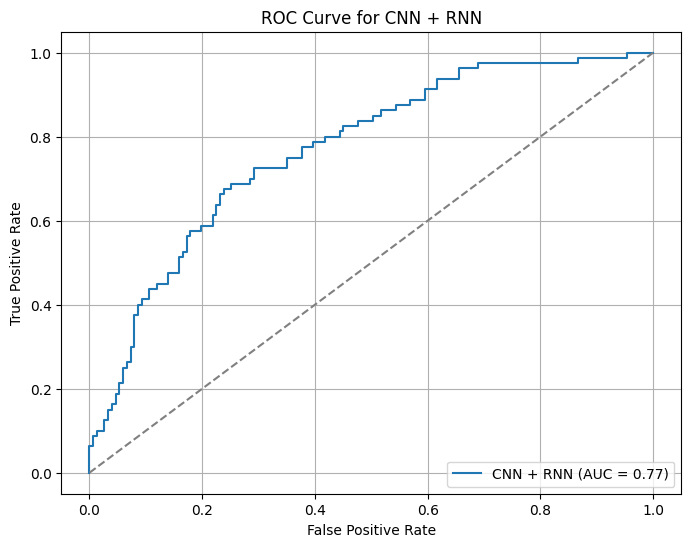

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


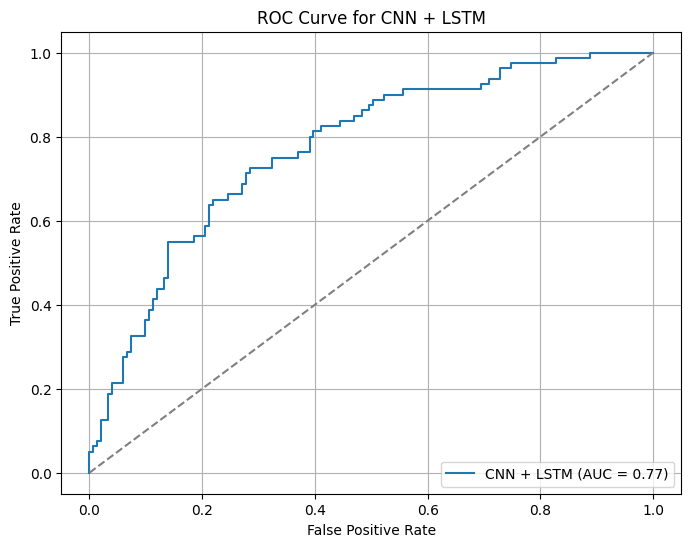

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve and save it
def plot_roc_curve(model, X_test, y_test, label, filename):
    y_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title(f'ROC Curve for {label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot ROC for ANN model
plot_roc_curve(ann_model, X_test, y_test, 'ANN', 'roc_curve_ann.png')

# Plot ROC for CNN model
plot_roc_curve(cnn_model, X_test_cnn, y_test, 'CNN', 'roc_curve_cnn.png')

# Plot ROC for RNN model
plot_roc_curve(rnn_model, X_test_rnn, y_test, 'RNN', 'roc_curve_rnn.png')

# Plot ROC for LSTM model
plot_roc_curve(lstm_model, X_test_rnn, y_test, 'LSTM', 'roc_curve_lstm.png')

# Plot ROC for CNN + RNN model
plot_roc_curve(cnn_rnn_model, X_test_cnn, y_test, 'CNN + RNN', 'roc_curve_cnn_rnn.png')

# Plot ROC for CNN + LSTM model
plot_roc_curve(cnn_lstm_model, X_test_cnn, y_test, 'CNN + LSTM', 'roc_curve_cnn_lstm.png')

Now accuracy verse epochs

Epoch 1/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8387 - loss: 0.3647 - val_accuracy: 0.7403 - val_loss: 0.5855
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.3323 - val_accuracy: 0.7446 - val_loss: 0.5832
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8277 - loss: 0.3368 - val_accuracy: 0.7359 - val_loss: 0.5830
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.3539 - val_accuracy: 0.7359 - val_loss: 0.5830
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8477 - loss: 0.3311 - val_accuracy: 0.7403 - val_loss: 0.5844
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.3163 - val_accuracy: 0.7403 - val_loss: 0.5836
Epoch 7/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8644 - loss: 0.3031 - val_accuracy: 0.7403 - val_loss: 0.5854
Epoch 8/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8408 - loss: 0.3266 - val_accuracy: 0.7359 - v

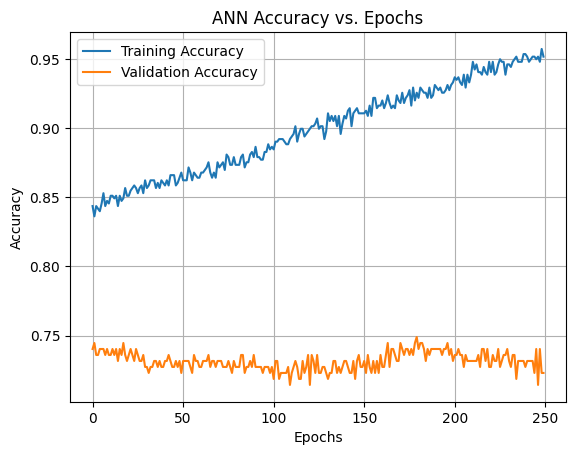

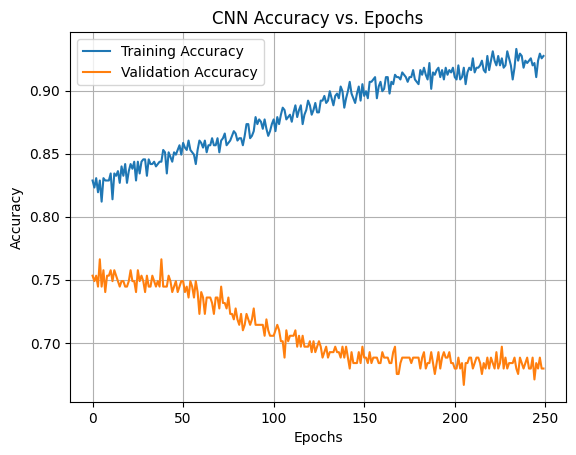

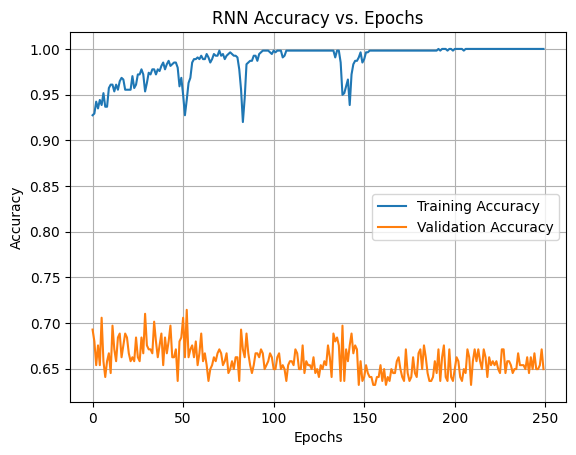

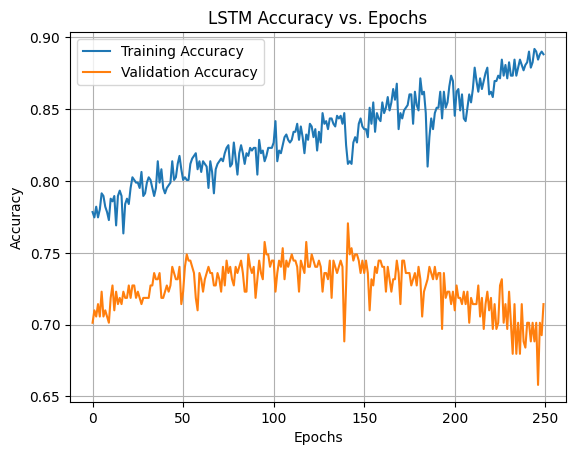

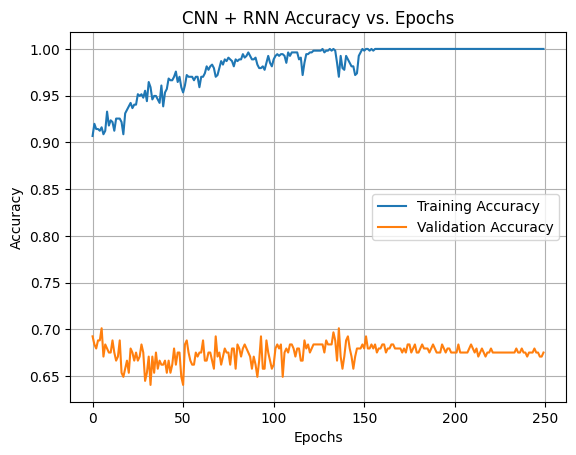

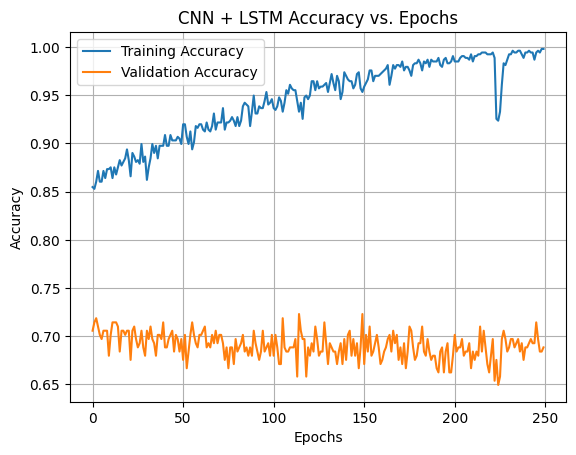

In [16]:
# For ANN Model
history_ann = ann_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# For CNN Model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_cnn, y_test))

# For RNN Model
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_rnn, y_test))

# For LSTM Model
history_lstm = lstm_model.fit(X_train_rnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_rnn, y_test))

# For CNN + RNN Model
history_cnn_rnn = cnn_rnn_model.fit(X_train_cnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_cnn, y_test))

# For CNN + LSTM Model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn, y_train, epochs=250, batch_size=32, validation_data=(X_test_cnn, y_test))



def plot_accuracy(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Accuracy vs. Epochs for each model
plot_accuracy(history_ann, 'ANN')
plot_accuracy(history_cnn, 'CNN')
plot_accuracy(history_rnn, 'RNN')
plot_accuracy(history_lstm, 'LSTM')
plot_accuracy(history_cnn_rnn, 'CNN + RNN')
plot_accuracy(history_cnn_lstm, 'CNN + LSTM')


Attempt to create table as in the paper given

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss
import pandas as pd
import numpy as np

# Function to calculate metrics
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    # Get training and testing predictions (probabilities and classes)
    y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

    y_train_prob = model.predict(X_train)
    y_test_prob = model.predict(X_test)

    # Calculate training and testing accuracy
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Calculate Log-loss
    logloss = log_loss(y_test, y_test_prob)

    return train_accuracy, test_accuracy, precision, recall, f1, auc_score, logloss

# Store results in a dictionary
results = {}

# Calculate metrics for each model
results['ANN'] = calculate_metrics(ann_model, X_train, X_test, y_train, y_test)
results['CNN'] = calculate_metrics(cnn_model, X_train_cnn, X_test_cnn, y_train, y_test)
results['RNN'] = calculate_metrics(rnn_model, X_train_rnn, X_test_rnn, y_train, y_test)
results['LSTM'] = calculate_metrics(lstm_model, X_train_rnn, X_test_rnn, y_train, y_test)
results['CNN + RNN'] = calculate_metrics(cnn_rnn_model, X_train_cnn, X_test_cnn, y_train, y_test)
results['CNN + LSTM'] = calculate_metrics(cnn_lstm_model, X_train_cnn, X_test_cnn, y_train, y_test)



# Convert results into a DataFrame
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'Log-Loss']
data = []

for model_name, metrics in results.items():
    data.append([model_name] + list(metrics))

df = pd.DataFrame(data, columns=columns)

# Display the table
print(df)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
        Model  Train Accuracy  Test Accuracy  Precision  Recall  

In [20]:

# Convert results into a DataFrame
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'Log-Loss']
data = []

for model_name, metrics in results.items():
    data.append([model_name] + [round(metric, 3) for metric in metrics]) # Round to 3 decimals

df = pd.DataFrame(data, columns=columns)

# Display the table
df

# ... (rest of your existing code)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,AUC,Log-Loss
0,ANN,0.957,0.723,0.603,0.588,0.595,0.756,0.875
1,CNN,0.935,0.680,0.542,0.488,0.513,0.715,1.021
2,RNN,1.000,0.649,0.494,0.538,0.515,0.680,3.143
3,LSTM,0.894,0.714,0.606,0.500,0.548,0.703,1.453
4,CNN + RNN,1.000,0.675,0.526,0.638,0.576,0.703,3.004
5,CNN + LSTM,0.998,0.688,0.547,0.588,0.566,0.726,2.378


In [21]:
# prompt: write code to evaluate the accuracy of the models above

# Assuming the necessary libraries and models (ann_model, cnn_model, etc.) are already defined and trained as in the provided code.

from sklearn.metrics import classification_report

# Function to evaluate a model and print the classification report
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


# Evaluate each model
evaluate_model(ann_model, X_test, y_test, "ANN")
evaluate_model(cnn_model, X_test_cnn, y_test, "CNN")
evaluate_model(rnn_model, X_test_rnn, y_test, "RNN")
evaluate_model(lstm_model, X_test_rnn, y_test, "LSTM")
evaluate_model(cnn_rnn_model, X_test_cnn, y_test, "CNN+RNN")
evaluate_model(cnn_lstm_model, X_test_cnn, y_test, "CNN+LSTM")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report for RNN:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       151
           1       0.49    